* `Pull the Dataset from Kaggle` [Here](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)


In [1]:
!pip install -q kagglehub

In [2]:
from google.colab import files
import os
import kagglehub

# Step 1: Upload kaggle.json manually
print("📂 Please upload your kaggle.json file:")
uploaded = files.upload()

# Ensure the uploaded file exists
if "kaggle.json" not in uploaded:
    print("❌ kaggle.json upload failed. Please try again.")
else:
    # Step 2: Move the file to the correct location
    !mkdir -p /root/.config/kaggle
    !mv kaggle.json /root/.config/kaggle/

    # Step 3: Set proper permissions (read and write)
    !chmod 600 /root/.config/kaggle/kaggle.json

    # Step 4: Verify that the file exists
    if os.path.exists("/root/.config/kaggle/kaggle.json"):
        print("✅ kaggle.json uploaded and set up correctly!")
    else:
        print("❌ kaggle.json upload failed. Please check the file path.")

# Step 5: download dataset
try:
    dataset_path = kagglehub.dataset_download("puneet6060/intel-image-classification")
    print("✅ Dataset downloaded successfully!")
    print("📂 Path to dataset files:", dataset_path)

    # Step 7: Move dataset to /content/{dataset-name} for easier access
    target_path = os.path.join(os.getcwd(), "intel_dataset")
    !mkdir -p {target_path}  # Ensure target directory exists
    !cp -r {dataset_path}/* {target_path}/

    print(f"✅ Dataset moved to {target_path}")
    print("📂 Final Dataset contents:", os.listdir(target_path))

except Exception as e:
    print("❌ Error downloading dataset:", e)

📂 Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json
✅ kaggle.json uploaded and set up correctly!


100%|██████████| 346M/346M [00:02<00:00, 164MB/s]

Extracting files...


✅ Dataset downloaded successfully!
📂 Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2
✅ Dataset moved to /content/intel_dataset
📂 Final Dataset contents: ['seg_train', 'seg_pred', 'seg_test']


----

* `Import Libraries`

In [46]:
import glob
import os
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

* `Explore Dataset`

In [4]:
TRAIN_FOLDER_PATH = '/content/intel_dataset/seg_train/seg_train'
TEST_FOLDER_PATH = '/content/intel_dataset/seg_test/seg_test'
PRED_FOLDER_PATH = '/content/intel_dataset/seg_pred/seg_pred'

In [5]:
# For training
for folder in os.listdir(TRAIN_FOLDER_PATH):
    images = glob.glob(pathname=str(TRAIN_FOLDER_PATH +'/'+folder+'/*.jpg'))
    print(f'For training data , found {len(images)} in folder {folder}')

For training data , found 2404 in folder glacier
For training data , found 2274 in folder sea
For training data , found 2382 in folder street
For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2512 in folder mountain


In [6]:
# For Testing
for folder in os.listdir(TEST_FOLDER_PATH):
    images = glob.glob(pathname=str(TEST_FOLDER_PATH +'/'+folder+'/*.jpg'))
    print(f'For training data , found {len(images)} in folder {folder}')

For training data , found 553 in folder glacier
For training data , found 510 in folder sea
For training data , found 501 in folder street
For training data , found 437 in folder buildings
For training data , found 474 in folder forest
For training data , found 525 in folder mountain


In [7]:
# For Prediction (Has no labels)
files = glob.glob(pathname=str(PRED_FOLDER_PATH +'/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [8]:
# Check sizes for Training Dataset
sizes = []
for folder in os.listdir(TRAIN_FOLDER_PATH):
    images = glob.glob(pathname=str(TRAIN_FOLDER_PATH + '/' + folder + '/*.jpg'))
    for img in images:
        image = plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts().head()

,count
"(150, 150, 3)",13986
"(113, 150, 3)",7
"(111, 150, 3)",3
"(135, 150, 3)",3
"(134, 150, 3)",2


In [9]:
# Check sizes for Testing Dataset
sizes = []
for folder in os.listdir(TEST_FOLDER_PATH):
    images = glob.glob(pathname=str(TEST_FOLDER_PATH + '/' + folder + '/*.jpg'))
    for img in images:
        image = plt.imread(img)
        sizes.append(image.shape)

pd.Series(sizes).value_counts().head()

,count
"(150, 150, 3)",2993
"(76, 150, 3)",1
"(149, 150, 3)",1
"(110, 150, 3)",1
"(72, 150, 3)",1


In [10]:
# Check sizes for Prediction Dataset (Has no labels)
sizes = []
images = glob.glob(pathname=str(PRED_FOLDER_PATH + '/*.jpg'))
for img in images:
    image = plt.imread(img)
    sizes.append(image.shape)

pd.Series(sizes).value_counts().head()

,count
"(150, 150, 3)",7288
"(124, 150, 3)",1
"(129, 150, 3)",1
"(112, 150, 3)",1
"(143, 150, 3)",1


array([[[131, 194, 247],
        [131, 194, 247],
        [131, 194, 245],
        ...,
        [162, 217, 237],
        [165, 217, 238],
        [166, 218, 239]],

       [[131, 194, 247],
        [131, 194, 245],
        [131, 194, 245],
        ...,
        [166, 218, 239],
        [168, 219, 240],
        [166, 217, 238]],

       [[130, 193, 244],
        [130, 193, 244],
        [131, 193, 244],
        ...,
        [170, 218, 240],
        [171, 219, 239],
        [170, 218, 238]],

       ...,

       [[171, 171, 163],
        [168, 168, 158],
        [165, 165, 157],
        ...,
        [125, 147,  46],
        [119, 144,  43],
        [122, 147,  46]],

       [[190, 187, 178],
        [201, 199, 187],
        [216, 213, 204],
        ...,
        [134, 156,  56],
        [130, 154,  56],
        [136, 160,  62]],

       [[253, 251, 239],
        [249, 247, 235],
        [245, 243, 231],
        ...,
        [133, 155,  57],
        [125, 149,  53],
        [129, 153,  57]]], dtype=uint8)
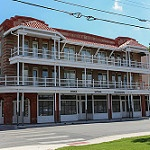

In [11]:
# Check images to see range of its values
plt.imread("/content/intel_dataset/seg_train/seg_train/buildings/1001.jpg")

* `I will work (100x100x3)`

-----

### `Build Custom Model`

In [12]:
# All images will only scaled with 1/255 (The same datagen for all images)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# For Training
train_gen = datagen.flow_from_directory(directory=TRAIN_FOLDER_PATH,
                                        target_size=(100, 100),
                                        batch_size=32,
                                        class_mode='categorical',   # "categorical" or "binary" or "sparse"
                                        color_mode='rgb',
                                        shuffle=True)

# For Testing
test_gen = datagen.flow_from_directory(directory=TEST_FOLDER_PATH,
                                        target_size=(100, 100),
                                        batch_size=32,
                                        class_mode='categorical',
                                        color_mode='rgb',
                                        shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


* `Build a Model`

In [13]:
model = tf.keras.models.Sequential([
    # Input Layer
    tf.keras.layers.Input(shape=(100, 100, 3)),

    # Conv Base
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    # Top Classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 50, 50, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 25, 25, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │              

 Total params: 5,257,926 (20.06 MB)

 Trainable params: 5,256,710 (20.05 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

# Early stopping
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Fitting
history = model.fit(train_gen,
                    validation_data=(test_gen),
                    steps_per_epoch=len(train_gen),
                    validation_steps=len(test_gen),
                    epochs=10,   # need more epochs
                    callbacks=[early_stopp])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.4159 - loss: 1.6384 - val_accuracy: 0.6453 - val_loss: 1.0210
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.5662 - loss: 1.0634 - val_accuracy: 0.7397 - val_loss: 0.7726
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.6347 - loss: 0.9303 - val_accuracy: 0.7513 - val_loss: 0.6748
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.6617 - loss: 0.8634 - val_accuracy: 0.7277 - val_loss: 0.7237
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.6811 - loss: 0.8152 - val_accuracy: 0.7717 - val_loss: 0.6438
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.7126 - loss: 0.7481 - val_accuracy: 0.8267 - val_loss: 0.5227
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.7207 - loss: 0.7098 - val_accuracy: 0.7427 - val_loss: 0.7168
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.7229 - loss: 0.7055 - val_accurac

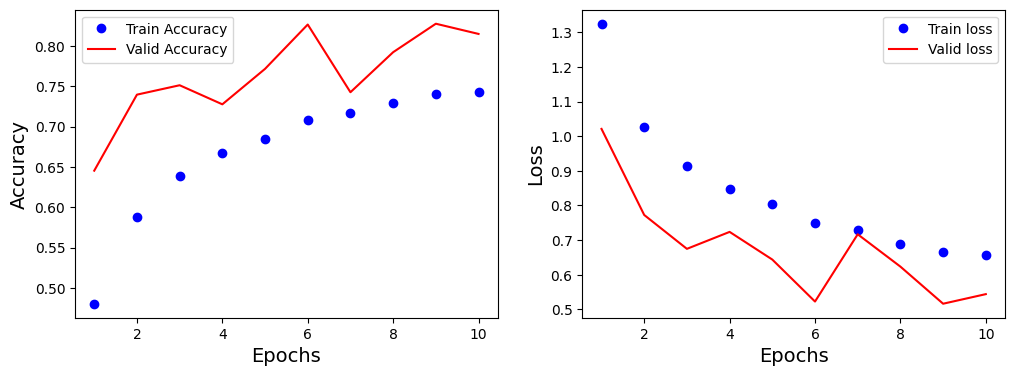

In [15]:
# Visualize the resutls
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

In [ ]:
# Evaluate on test_set
loss_test, acc_test = model.evaluate(test_gen, verbose=0)
print('loss_test =>', loss_test)
print('acc_test =>', acc_test)

loss_test => 0.5163951516151428
acc_test => 0.8276666402816772


----

### `Using Transfer Learning (Feature Extraction)`

In [17]:
# Load MobileNetV2 and use it as a ConvBase
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet'
)

<ipython-input-17-82eb0238350a>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
# Freeze the base model (only as a feature extractor)
base_model.trainable = False

In [40]:
# Use the function for processing for the choosen model
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

# For Training
train_gen = datagen.flow_from_directory(directory=TRAIN_FOLDER_PATH,
                                        target_size=(100, 100),
                                        batch_size=32,
                                        class_mode='categorical',   # "categorical" or "binary" or "sparse"
                                        color_mode='rgb',
                                        shuffle=True)

# For Testing
test_gen = datagen.flow_from_directory(directory=TEST_FOLDER_PATH,
                                        target_size=(100, 100),
                                        batch_size=32,
                                        class_mode='categorical',
                                        color_mode='rgb',
                                        shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
# Create a new model
model = tf.keras.Sequential([
    base_model,  # Feature Extractor
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
# Compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

# Early stopping
early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Fitting
history = model.fit(train_gen,
                    validation_data=(test_gen),
                    steps_per_epoch=len(train_gen),
                    validation_steps=len(test_gen),
                    epochs=10,   # need more epochs
                    callbacks=[early_stopp])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.5259 - loss: 1.4053 - val_accuracy: 0.8503 - val_loss: 0.4226
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.8164 - loss: 0.5145 - val_accuracy: 0.8640 - val_loss: 0.3858
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.8451 - loss: 0.4304 - val_accuracy: 0.8707 - val_loss: 0.3606
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.8606 - loss: 0.3804 - val_accuracy: 0.8747 - val_loss: 0.3421
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.8696 - loss: 0.3531 - val_accuracy: 0.8823 - val_loss: 0.3345
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.8788 - loss: 0.3320 - val_accuracy: 0.8823 - val_loss: 0.3319
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.8892 - loss: 0.3162 - val_accuracy: 0.8850 - val_loss: 0.3271
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.8936 - loss: 0.2978 - val_accurac

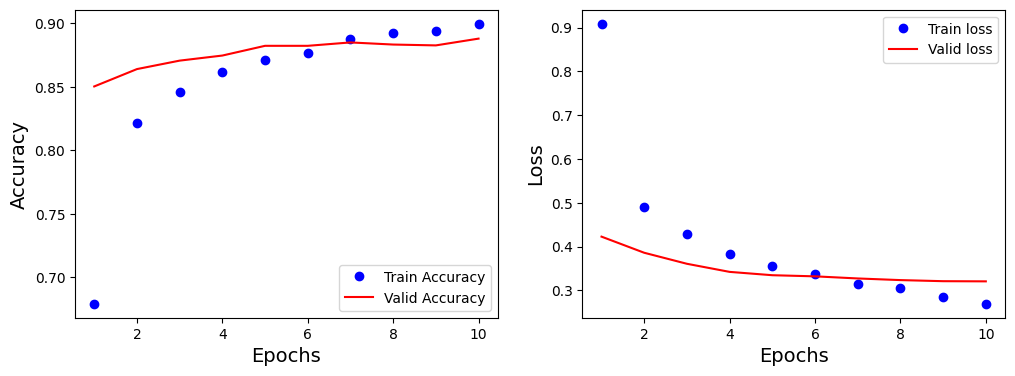

In [23]:
# Visualize the resutls
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
n_epochs = len(history.history['loss'])  # real number of epochs in history, as we made early stopp
plt.sca(ax[0])
plt.plot(range(1, n_epochs+1), history.history['accuracy'], 'bo', label='Train Accuracy')
plt.plot(range(1, n_epochs+1), history.history['val_accuracy'], 'r-', label='Valid Accuracy')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy',  fontsize=14)
plt.legend()

plt.sca(ax[1])
plt.plot(range(1, n_epochs+1), history.history['loss'], 'bo', label='Train loss')
plt.plot(range(1, n_epochs+1), history.history['val_loss'], 'r-', label='Valid loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss',  fontsize=14)
plt.legend()
plt.show()

In [ ]:
# Evaluate on test_set
loss_test, acc_test = model.evaluate(test_gen, verbose=0)
print('loss_test =>', loss_test)
print('acc_test =>', acc_test)

loss_test => 0.3204694092273712
acc_test => 0.8880000114440918


---

In [25]:
ASSETS_FOLDER_PATH = os.path.join(os.getcwd(), "assets")
os.makedirs(ASSETS_FOLDER_PATH, exist_ok=True)

In [ ]:
# dump model
model.save(os.path.join(ASSETS_FOLDER_PATH, "model.keras"))

# Idx2Label and dump it
idx2label = {v: k for k, v in train_gen.class_indices.items()}
joblib.dump(idx2label, os.path.join(ASSETS_FOLDER_PATH, "idx2label.joblib"))

['/content/assets/idx2label.joblib']

### `Inference`

In [51]:
# Get list of images
images_paths = glob.glob(str(PRED_FOLDER_PATH + '/*.jpg'))[:10]

# Preprocess images for prediction
def preprocess_image(image_path: str):
  # Load image
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(100, 100))
  # To array
  image_array = tf.keras.preprocessing.image.img_to_array(image)
  # Add batch dimension
  image_array = np.expand_dims(image_array, axis=0)
  # Process for the choosen model
  image_array = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
  return image_array

# Apply on example (general one sample or more)
preprocessed_images = np.vstack([preprocess_image(img) for img in images_paths])
preprocessed_images.shape

(10, 100, 100, 3)

In [59]:
# Prediction
y_pred = np.argmax(model.predict(preprocessed_images), axis=-1)

# Decode
y_pred_class = [idx2label[i] for i in y_pred]
y_pred_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


['glacier',
 'mountain',
 'buildings',
 'forest',
 'forest',
 'forest',
 'sea',
 'glacier',
 'sea',
 'buildings']

----